## Elliptic Curves

Elliptic curves can be created easily with the command EllipticCurve

Suppose we want to create the curve $y^2 = x^3 + x + 1 \mod 13$


In [2]:
p = 13
b = 1
c = 1

E = EllipticCurve(Zmod(p),[b,c])
print(E)

Elliptic Curve defined by y^2 = x^3 + x + 1 over Ring of integers modulo 13


We can check if the curve is singular

In [3]:
E.is_singular()

False

We can plot the curve

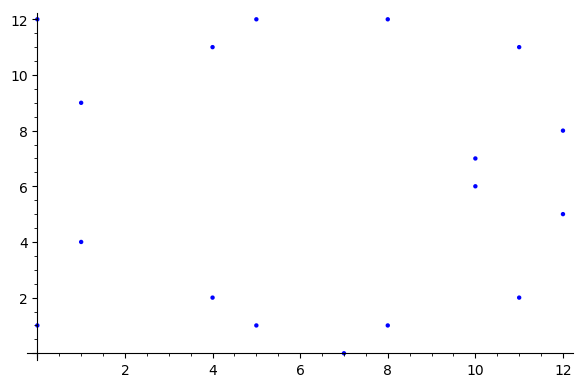

In [4]:
E.plot()

How many points?

In [5]:
E.order()

18

We can do that only because the curve is small. We can also print the points.

In [16]:
E.points()

[(0 : 1 : 0), (0 : 1 : 1), (0 : 12 : 1), (1 : 4 : 1), (1 : 9 : 1), (4 : 2 : 1), (4 : 11 : 1), (5 : 1 : 1), (5 : 12 : 1), (7 : 0 : 1), (8 : 1 : 1), (8 : 12 : 1), (10 : 6 : 1), (10 : 7 : 1), (11 : 2 : 1), (11 : 11 : 1), (12 : 5 : 1), (12 : 8 : 1)]

Sagemath uses projective coordinates, so the points have three coordinates (x,y,z).
z is always equal to 1, except for the infinity, which has z = 0.
In sagemath the point at infinity is (0:1:0).

If we do not have the infinity, we can write the points in the usual (x,y) coordinates using E.xy()

In [20]:
[P.xy() for P in E.points()[1:] ]

[(0, 1),
 (0, 12),
 (1, 4),
 (1, 9),
 (4, 2),
 (4, 11),
 (5, 1),
 (5, 12),
 (7, 0),
 (8, 1),
 (8, 12),
 (10, 6),
 (10, 7),
 (11, 2),
 (11, 11),
 (12, 5),
 (12, 8)]

Let's find a generator

In [21]:
E.gens()

((1 : 9 : 1),)

In some domains you need multiple generators, so the function returns a tuple of generators. In our case a single generator is sufficient.

In [24]:
P=E.gens()[0]
print(P.xy())

(1, 9)


Let's see the order

In [25]:
P.order()

18

Sagemath tells that the order is 18, but we want to verify.

To verify that P is a generator, we multiply it by the divisors of the number of points $n$ and verify that the result is not infinity.

If the factorization of the number of points is $n=\sum p_i^{a_i}$, it is sufficient to try all the $N/p_i$

In [30]:
print("9P is: %s" % (9*P))
print("6P is: %s" % (6*P))

9P is: (7 : 0 : 1)
6P is: (10 : 7 : 1)


We can also list the points or draw them in a wheel

In [35]:
[i*P for i in range(order(P))]

[(0 : 1 : 0),
 (1 : 9 : 1),
 (8 : 1 : 1),
 (0 : 1 : 1),
 (11 : 2 : 1),
 (5 : 12 : 1),
 (10 : 7 : 1),
 (12 : 5 : 1),
 (4 : 11 : 1),
 (7 : 0 : 1),
 (4 : 2 : 1),
 (12 : 8 : 1),
 (10 : 6 : 1),
 (5 : 1 : 1),
 (11 : 11 : 1),
 (0 : 12 : 1),
 (8 : 12 : 1),
 (1 : 4 : 1)]

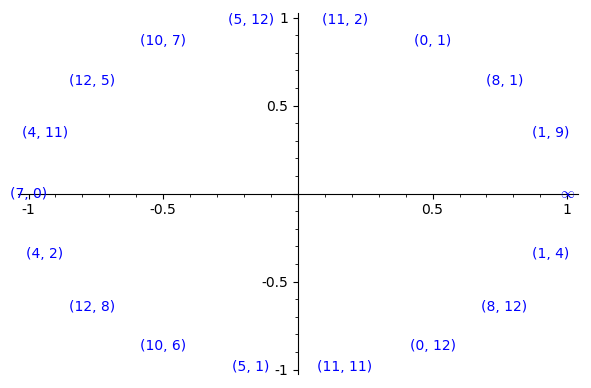

In [36]:
#g = list_plot([(cos(2*pi*t/order(P)),sin(2*pi*t/order(P))) for t in range(order(P))])
g = text(r"$\infty$",(1,0))
for t in range(1,order(P)):
    g += text((t*P).xy(),(cos(2*pi*t/order(P)),sin(2*pi*t/order(P))))
g

## ECDSA

We now execute some real ECDSA using a standard curve.

In [37]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives.asymmetric.utils import decode_dss_signature

We use NIST curve SECP384r1. The key size is 384 bits.
There is no need to generate parameters, because the standard already provides the curve equation, a generator and its order.

We proceed with the generation of a private key and of the corresponding public key.

In [40]:
private_key = ec.generate_private_key(
    ec.SECP384R1(), default_backend()
    )
print("Private key is: %d" % private_key.private_numbers().private_value)
public_key = private_key.public_key()
print("Public key is : %s" % public_key.public_numbers())

Private key is: 6461216294477480606504673742447275348529627389994382965713045066711064946957582817198445665432445758196810139068216
Public key is : <EllipticCurvePublicNumbers(curve=secp384r1, x=37053770842938270296157497301751432528566966137607322619709506809176315409076334838114818116750798125218675918937066, y=35445389969712088269142744103570060987384403875318179020259397541574949053098800283873426606285531333460190017618063>


Remember that the private key is an integer, while the public key is a point. Now we can sign a message.
The signature will be encoded using the DER rules, so it will be a string of bits.

In [43]:
data = b"this is some data I'd like to sign"
signature = private_key.sign(
    data,
    ec.ECDSA(hashes.SHA256())
    )
print(signature.encode('hex'))

30640230049fcfe5330a5af0cd096a1ff035459e951c786fc233384dd16c694f062c60f2fbaa076f6f7bc3499b42b48331319b41023009d1d73524b90dbe5c6f031f8450d3729c362fbbada5381e6a92148bbcc3933418c3293ec8768ce684443c100ff1199b


The DSA signature is randomized, so if we run the algorithm again we get a different signature. The interface does not ask for a nonce, so we cannot make the mistake of providing repeated nonces.

In [44]:
signature = private_key.sign(
    data,
    ec.ECDSA(hashes.SHA256())
    )
print(signature.encode('hex'))

3066023100a24fdcd9249f10ea34ea491bd1f0aa16edbfc2035aafc0b838fb0022ff39edade692f85a2d218c377e8c56c1acb134f7023100c90c4d42e437009c2390fdbd9b49b6c419c99273d58820eac012594bbbab4a797a0c5095c706698e2e7ec381fd0af28e


We can decode the signature and retrieve the parameters $r$ and $s$

In [50]:
(r,s)=decode_dss_signature(signature)
print("r = %d\ns = %d" % (r,s) )

r = 24982097642787267986548555712228631724179527408594898696954855470642240630496006843591264690319708303563011589747959
s = 30944127601892930516756066797417630871615665660231645224590109722979384173750777828174756681963675496258376691282574


We can verify the signature using the public key. If the signature is wrong, we get an exception

In [52]:
try:
    public_key.verify(signature,data,ec.ECDSA(hashes.SHA256()))
    print("OK")
except:
    print("KO")

OK


What happens if the message was modified?

In [53]:
modified_data = b"this is some forged data I'd like to sign"
try:
    public_key.verify(signature,modified_data,ec.ECDSA(hashes.SHA256()))
    print("OK")
except:
    print("KO")

KO


## Elliptic Curve
Let's play a bit with the SECP384r1 curve. The parameters are the following:

In [54]:
p = 2^384 - 2^128 - 2^96 + 2^32 - 1
b = -3
c = 27580193559959705877849011840389048093056905856361568521428707301988689241309860865136260764883745107765439761230575
gx = 0xaa87ca22be8b05378eb1c71ef320ad746e1d3b628ba79b9859f741e082542a385502f25dbf55296c3a545e3872760ab7
gy = 0x3617de4a96262c6f5d9e98bf9292dc29f8f41dbd289a147ce9da3113b5f0b8c00a60b1ce1d7e819d7a431d7c90ea0e5f
ordg = 39402006196394479212279040100143613805079739270465446667946905279627659399113263569398956308152294913554433653942643

In [58]:
E = EllipticCurve(Zmod(p),[b,c])
G = E(gx,gy)
print("E = %s" % E)
print("G = (\n%d,\n%d)" % G.xy())

E = Elliptic Curve defined by y^2 = x^3 + 39402006196394479212279040100143613805079739270465446667948293404245721771496870329047266088258938001861606973112316*x + 27580193559959705877849011840389048093056905856361568521428707301988689241309860865136260764883745107765439761230575 over Ring of integers modulo 39402006196394479212279040100143613805079739270465446667948293404245721771496870329047266088258938001861606973112319
G = (
26247035095799689268623156744566981891852923491109213387815615900925518854738050089022388053975719786650872476732087,
8325710961489029985546751289520108179287853048861315594709205902480503199884419224438643760392947333078086511627871)


Is the curve singular?

In [59]:
E.is_singular()

False

Let's verify that the order of $G$ is correct.

In [62]:
ordg*G

(0 : 1 : 0)

Ok, but what about the factors?

In [63]:
is_prime(ordg)

True

Oh, the order of $G$ is prime. The standard also says that $G$ is a generator of the curve. Let's compare it with Hasse's theorem.

In [66]:
abs(ordg-(p+1)) < 2*sqrt(p+0.0)

True

Ok, it is consistent with Hasse's theorem.

Now we can try to calculate the public key from the private key.

In [69]:
P = private_key.private_numbers().private_value * G
P.xy()

(37053770842938270296157497301751432528566966137607322619709506809176315409076334838114818116750798125218675918937066,
 35445389969712088269142744103570060987384403875318179020259397541574949053098800283873426606285531333460190017618063)

Compare that to the public key calculated with the openssl library

In [70]:
public_key.public_numbers()

<EllipticCurvePublicNumbers(curve=secp384r1, x=37053770842938270296157497301751432528566966137607322619709506809176315409076334838114818116750798125218675918937066, y=35445389969712088269142744103570060987384403875318179020259397541574949053098800283873426606285531333460190017618063>